In [50]:
import pandas as pd
import numpy as np
import data_describe as dd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Create a directory to hold the data
! mkdir census_data

# Download the data
! curl https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data --output census_data/adult.data
! curl https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test --output census_data/adult.test

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 3881k  100 3881k    0     0  5528k      0 --:--:-- --:--:-- --:--:-- 5520k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1956k  100 1956k    0     0  3556k      0 --:--:-- --:--:-- --:--:-- 3550k


In [2]:
COLUMNS = (
    'age',
    'workclass',
    'fnlwgt',
    'education',
    'education-num',
    'marital-status',
    'occupation',
    'relationship',
    'race',
    'sex',
    'capital-gain',
    'capital-loss',
    'hours-per-week',
    'native-country',
    'income-level'
)

In [3]:
df = pd.read_csv('./census_data/adult.data', header=None, names=COLUMNS)

In [22]:
df.shape

(32561, 15)

In [28]:
df.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income-level
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [7]:
df['income-level'] = df['income-level'].map({' <=50K': 0,' >50K': 1})

In [17]:
df['workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [19]:
df['education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

In [20]:
df['marital-status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital-status, dtype: int64

In [33]:
df['occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

In [23]:
df['relationship'].value_counts()

 Husband           13193
 Not-in-family      8305
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: relationship, dtype: int64

In [24]:
df['race'].value_counts()

 White                 27816
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: race, dtype: int64

In [25]:
df['sex'].value_counts()

 Male      21790
 Female    10771
Name: sex, dtype: int64

In [27]:
df['native-country'].value_counts()

 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

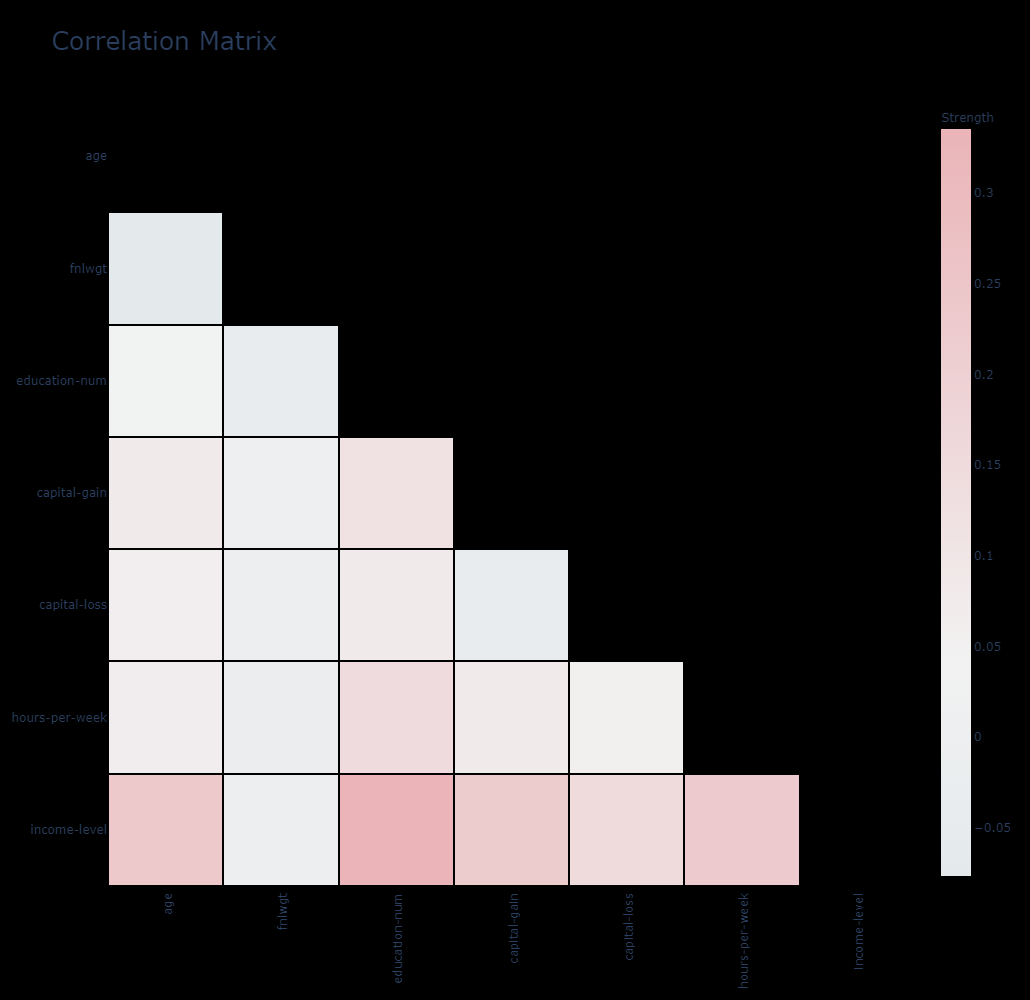

In [10]:
dd.correlation_matrix(df)

In [36]:
# We see there are many corrupt values as '?', we will replace them with null values
df.replace({' ?':np.nan},inplace=True)

In [37]:
dd.data_summary(df)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income-level
Data Type,int64,object,int64,object,int64,object,object,object,object,object,int64,int64,int64,object,int64
Mean,38.5816,,189778,,10.0807,,,,,,1077.65,87.3038,40.4375,,0.24081
Standard Deviation,13.6404,,105550,,2.57272,,,,,,7385.29,402.96,12.3474,,0.427581
Median,37,,178356,,10,,,,,,0,0,40,,0
Min,17,,12285,,1,,,,,,0,0,1,,0
Max,90,,1484705,,16,,,,,,99999,4356,99,,1
# Zeros,0,,0,,0,,,,,,29849,31042,0,,24720
# Nulls,0,1836,0,0,0,0,1843,0,0,0,0,0,0,583,0
% Most Frequent Value,2.76,69.7,0.04,32.25,32.25,45.99,12.71,40.52,85.43,66.92,91.67,95.33,46.73,89.59,75.92


In [40]:
# Percentage of null values
100*df.isnull().sum()[df.isnull().sum()>0]/df.shape[0]

workclass         5.638647
occupation        5.660146
native-country    1.790486
dtype: float64

In [41]:
#imputing missing values with mode
df['workclass'].fillna(df['workclass'].mode().values[0],inplace=True)
df['occupation'].fillna(df['occupation'].mode().values[0],inplace=True)
df['native-country'].fillna(df['native-country'].mode().values[0],inplace=True)

<AxesSubplot:title={'center':'Data Heatmap'}, xlabel='Record #', ylabel='Variable'>

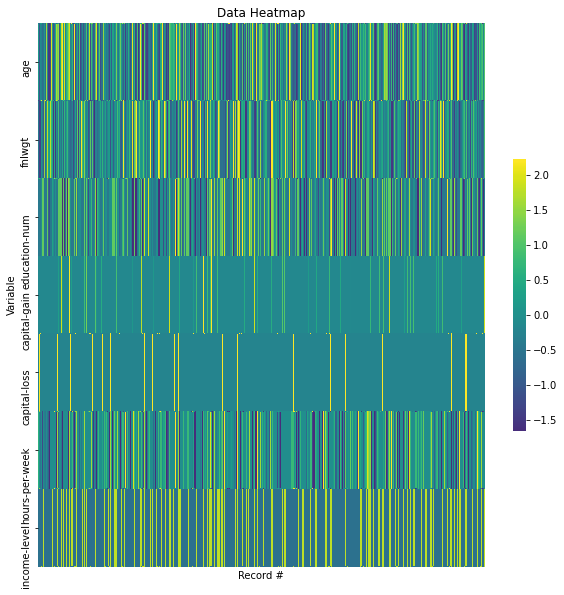

In [42]:
dd.data_heatmap(df)

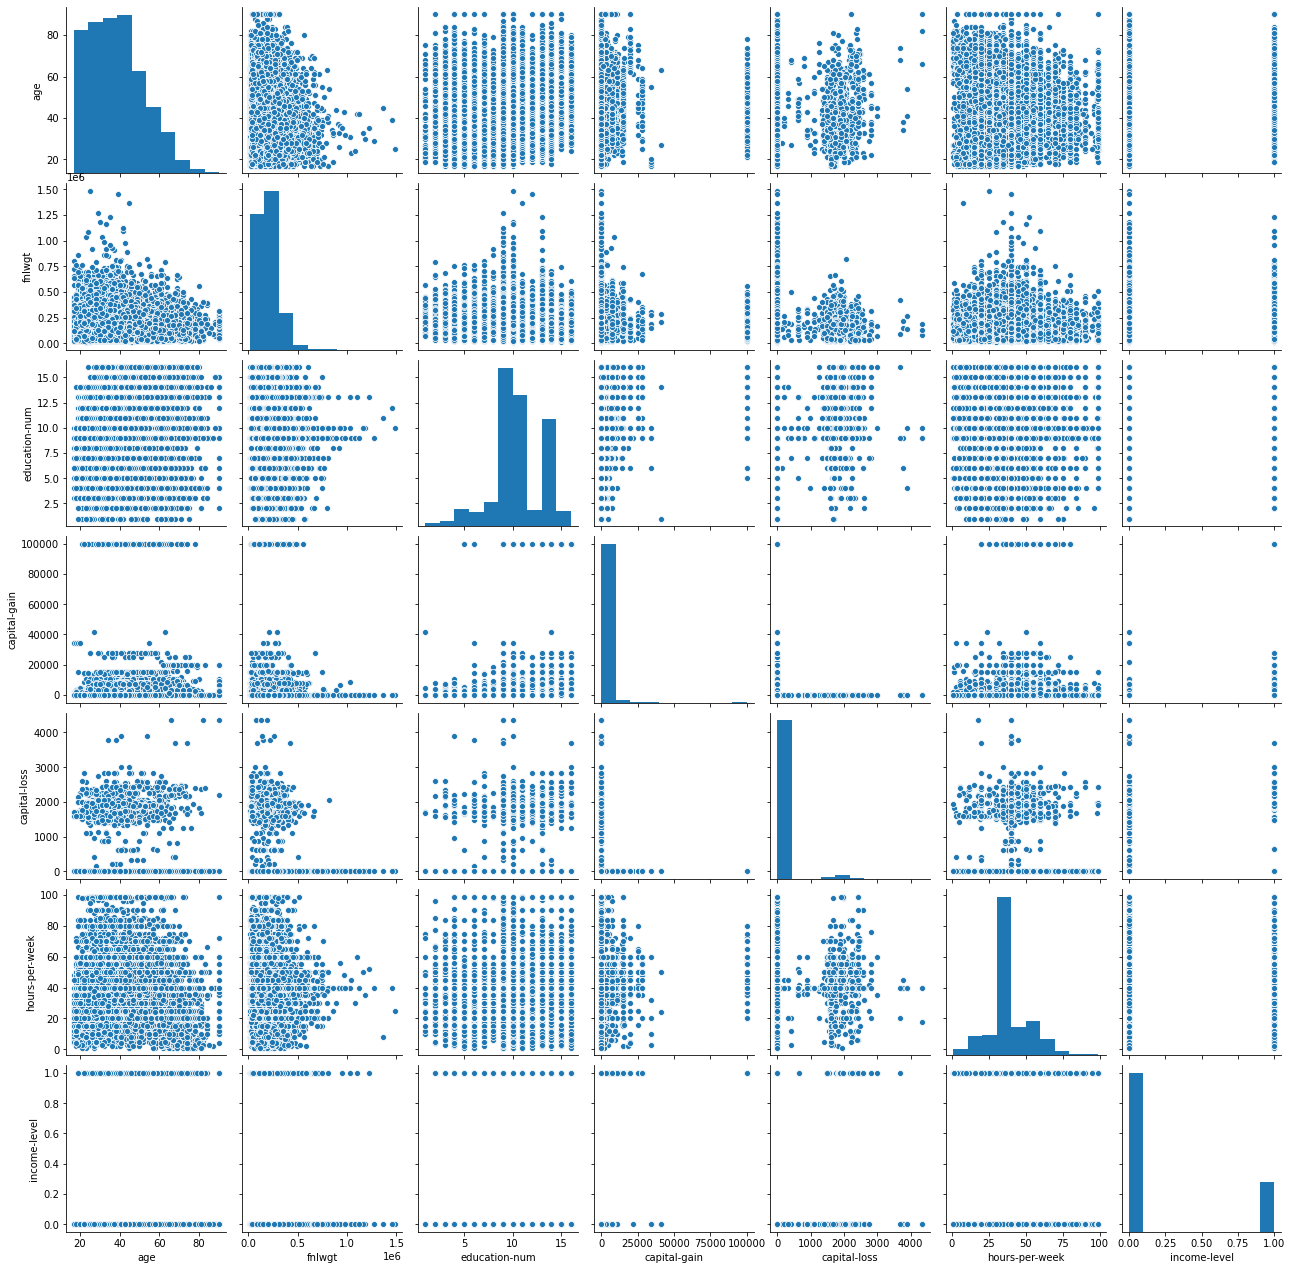

In [43]:
dd.scatter_plots(df, plot_mode='matrix')

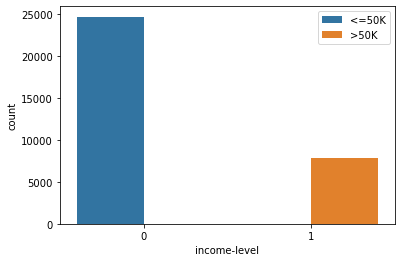

In [60]:
# We see that most of the datapoints have income less then 50K
ax= sns.countplot(data = df, x = 'income-level', hue='income-level' ) 
legend_labels, _= ax.get_legend_handles_labels()
ax.legend(legend_labels, ['<=50K','>50K'],
          bbox_to_anchor=(1,1)
          )

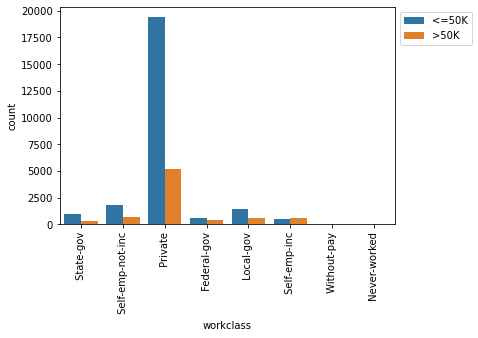

In [73]:
ax= sns.countplot(data = df, x = 'workclass' , hue = 'income-level')
legend_labels, _= ax.get_legend_handles_labels()
ax.legend(legend_labels, ['<=50K','>50K'],
          bbox_to_anchor=(1,1)
          )
plt.xticks(rotation = 90)
plt.show()


We see most of worksclass belong to the Private sector

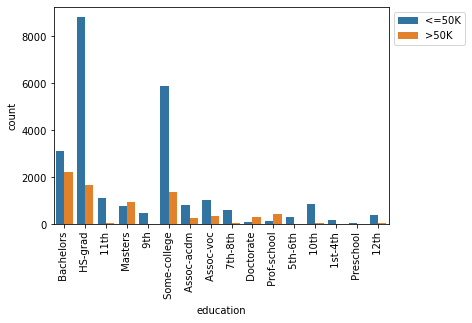

In [74]:
ax= sns.countplot(data = df, x = 'education' , hue = 'income-level')
legend_labels, _= ax.get_legend_handles_labels()
ax.legend(legend_labels, ['<=50K','>50K'],
          bbox_to_anchor=(1,1)
          )
plt.xticks(rotation = 90)
plt.show()


Most of the people are HS Graduates. Also higher education has more chances of having income >50K

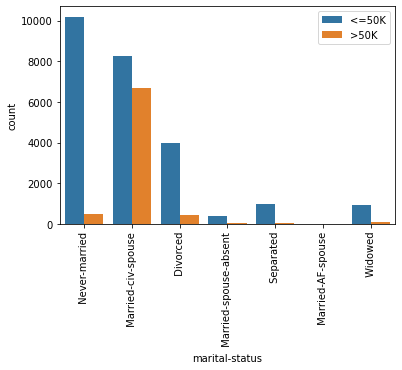

In [98]:
ax= sns.countplot(data = df, x = 'marital-status' , hue = 'income-level')
legend_labels, _= ax.get_legend_handles_labels()
ax.legend(legend_labels, ['<=50K','>50K'],
          bbox_to_anchor=(1,1)
          )
plt.xticks(rotation = 90)
plt.show()


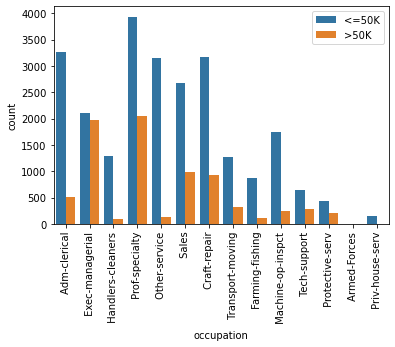

In [79]:
ax= sns.countplot(data = df, x = 'occupation' , hue = 'income-level')
legend_labels, _= ax.get_legend_handles_labels()
ax.legend(legend_labels, ['<=50K','>50K'],
          bbox_to_anchor=(1,1)
          )
plt.xticks(rotation = 90)
plt.show()


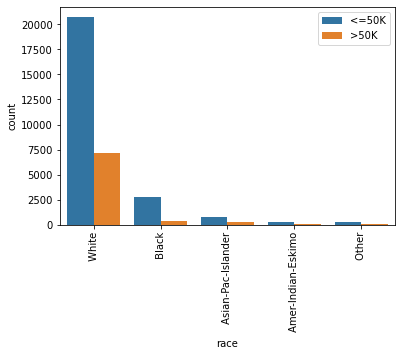

In [80]:
ax= sns.countplot(data = df, x = 'race' , hue = 'income-level')
legend_labels, _= ax.get_legend_handles_labels()
ax.legend(legend_labels, ['<=50K','>50K'],
          bbox_to_anchor=(1,1)
          )
plt.xticks(rotation = 90)
plt.show()


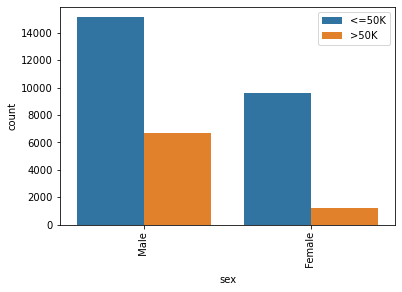

In [81]:
ax= sns.countplot(data = df, x = 'sex' , hue = 'income-level')
legend_labels, _= ax.get_legend_handles_labels()
ax.legend(legend_labels, ['<=50K','>50K'],
          bbox_to_anchor=(1,1)
          )
plt.xticks(rotation = 90)
plt.show()


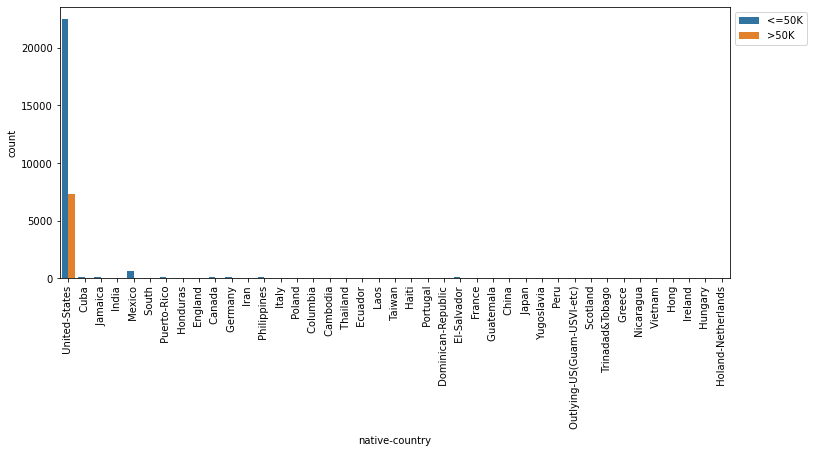

In [84]:
plt.figure(figsize=(12,5))
ax= sns.countplot(data = df, x = 'native-country' , hue = 'income-level')
legend_labels, _= ax.get_legend_handles_labels()
ax.legend(legend_labels, ['<=50K','>50K'],
          bbox_to_anchor=(1,1)
          )
plt.xticks(rotation = 90)

plt.show()


Most of the people are from US 

<AxesSubplot:xlabel='age'>

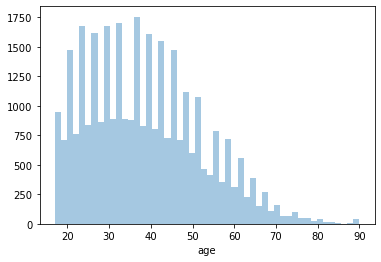

In [89]:
sns.distplot(df['age'], kde = False)

Age seems to right skewed

<AxesSubplot:xlabel='capital-loss'>

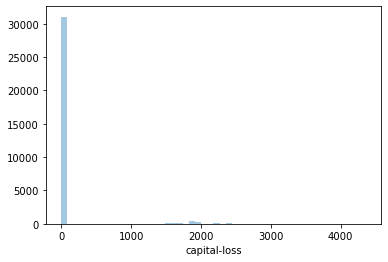

In [90]:
sns.distplot(df['capital-loss'], kde = False)

We see majority of pople have no capital loss

<AxesSubplot:xlabel='capital-gain'>

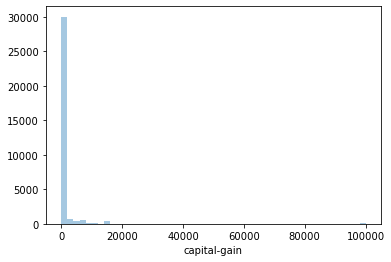

In [92]:
sns.distplot(df['capital-gain'], kde = False)

No Capital gain. However there are cases where the capital gain is very high

In [94]:
#creating seprate dataframes for cases where the income is greater than 50K and Less than 50K
gt_50 = df[df['income-level']== 1]
ls_50 = df[df['income-level']== 0]

<AxesSubplot:xlabel='age'>

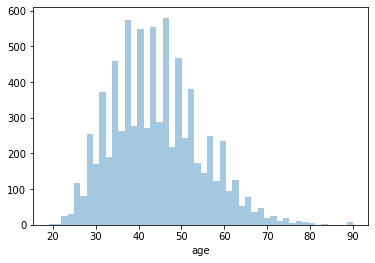

In [95]:
sns.distplot(gt_50['age'], kde = False)

We see people with ages betweek 55 to 60 have more changes of having income greater than 50K

<AxesSubplot:xlabel='age'>

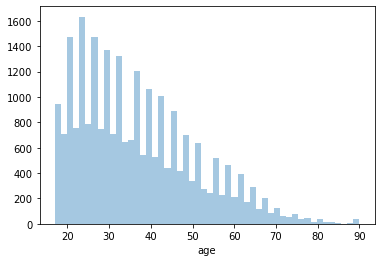

In [96]:
sns.distplot(ls_50['age'], kde = False)

The Age distribution of people with income less than 50K is right skewed

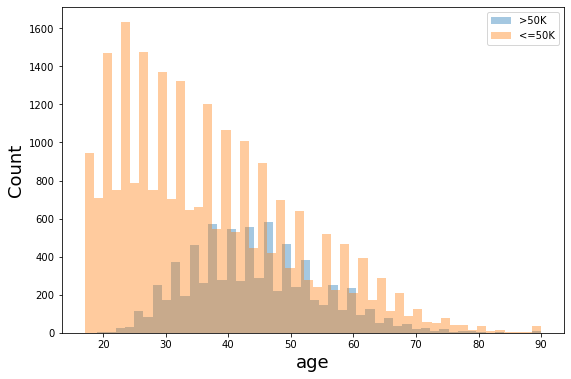

In [97]:
plt.figure(figsize=(9,6))


plt.xlabel('Age (in Years)', fontsize=18)
plt.ylabel('Count', fontsize=18)


sns.distplot(gt_50['age'], kde = False, label = '>50K')
sns.distplot(ls_50['age'], kde = False, label = '<=50K')
plt.legend()

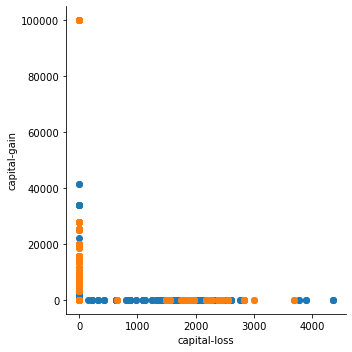

In [100]:
sns.FacetGrid(df, hue="income-level",height=5) \
   .map(plt.scatter, "capital-loss", "capital-gain") \
  

Capital gain and capital loss are inversely propostional